## Assignment 2

Python modules used

In [5]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import heapq
import matplotlib.pyplot as plt
eps = np.finfo(float).eps

### Question 1: KNN Classifier

The KNN classifier works based on proximity to other data in the set of points. The distance to other points can be calculated using various different distance measures. The general procedure for the KNN classifier for every new point is
<ol>
    <li>For every point in the set of points in the KNN classifier calculate the distance from the new point.</li>
    <li>Select he K most closest points</li>
    <li>
        For binary classification
        <ul>
            <li>Choose K to be an odd number</li>
            <li>From the K closest point find the most represented class and assign the new point to that class</li>
        </ul>
    </li>
    <li> For multiclass classification there may be more than one class with equal number of representative points in the KNN set. 
        <ul>
            <li>For each class of points in the set of K points compute the weighted sum of distances for each point in the class</li>
            <li>Classify the point to the most represented class in the K neighbour set.</li>
            <li>In case of ties arbitrate using the wighted sums of all the points in a given class</li>
        </ul>
    </li>
</ol>
The weights in case of weighted sums should be taken such that closer points have a larger effect than far away points. A simple method would be to use inverses of distances as weights.
    

#### Robot Dataset

In [639]:
#distance parameters
def norm(p):
    
    def pnorm(point,newPoint):
        euNorm = 0
        for i,j in list(zip(point,newPoint)):
            euNorm += abs(i - j)**p
        if p == 0:
            return euNorm
        return euNorm**(1/float(p))
    return pnorm

#find k minimum data points
def kminDist(pointSet,point,func,k):
    dist = [(func(point,i),j) for i,j in list(zip(pointSet,range(len(pointSet))))]
    return heapq.nsmallest(k,dist,key = lambda x: x[0])

In [637]:
def sciKnn(dataset,classIndex,features,k,t):
    split = int(t*dataset.shape[0])
    train = dataset[0:split,features]
    tlabel = dataset[0:split,classIndex]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train,tlabel.astype(str))
    validate = dataset[split:,features]
    vlabel = dataset[split:,classIndex]
    return knn.score(validate,vlabel.astype(str))
    
    

In [690]:
#k-means classifier

#knn predictor features is the n dimensional feature indices
def knnPredict(dataset,classIndex,features,k,testdata,func,labels):
    
    cdict = {}
    for c in labels:
        cdict[c] = np.array([0,float(0)])
    distVec = kminDist(dataset[:,features],testdata,func,k)
    for j in distVec:
        cdict[dataset[j[1]][classIndex]] += (1,j[0])
    
    vdist = [(i[0],i[1],j) for i,j in list(zip(cdict.values(),cdict.keys()))]
    vdist.sort(key = lambda x:(x[0],-x[0]),reverse=True)
    #print(vdist)
    return vdist[0][2]
    
#splits dataset into training and test(in this case an initial amount of data is not used for prediction)
def knnTest(dataset,classIndex,features,k,t=0.9,func=norm(2),test=None):
    
    split = int(t*dataset.shape[0])
    pointSet = dataset[0:split]
    labels = np.unique(dataset[:,classIndex])
    
    tp,tn,fp,fn = 0,0,0,0
    for i in dataset[split:]:
        #print(i)
        res = knnPredict(pointSet,classIndex,features,k,i[features],func,labels)
        if res == i[classIndex]:
            if res == 1:
                tp += 1
            else:
                tn += 1
        else:
            if res == 1:
                fp += 1
            else:
                fn += 1
    if test is not None:
        print("Test Data")
        for i in test:
            print(i,"Predicted Label",KnnPredict(pointSet,classIndex,features,k,i[features],func,labels))
            
    return (tp,tn,fp,fn),((tp + tn)/(tp + tn + fp + fn))

In [701]:
ndata1 = pd.read_csv("RobotDataset/Robot1",sep=" ",header=None).values[:,1:-1]
ndata2 = pd.read_csv("RobotDataset/Robot2",sep=" ",header=None).values[:,1:-1]
#drop the first and last columns since we are not using them
np.random.shuffle(ndata1)
np.random.shuffle(ndata2)

Robot Dataset 1
--------------------------------
My Implementation using eucludean distance 80% training data k = 7
Accuracy 0.8 Recall 0.7692307692307693 Precision 0.8333333333333334 F1 score 0.8
Scikit Accuracy
0.84


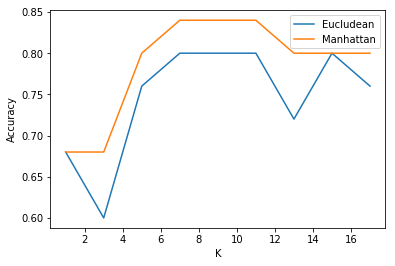

Robot Dataset 2
--------------------------------
My Implementation Using euclidean distance 80% training data k = 7
Accuracy 0.84 Recall 0.8333333333333334 Precision 0.8333333333333334 F1 score 0.8333333333333334
Scikit Accuracy
0.84


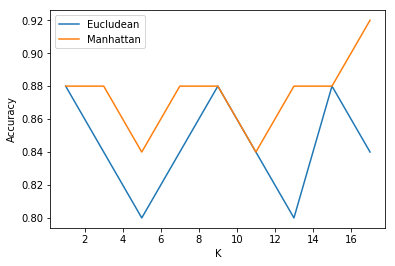

In [702]:
#plots
print("Robot Dataset 1\n--------------------------------")
print("My Implementation using eucludean distance 80% training data k = 7")
tp,tn,fp,fn = knnTest(ndata1,0,[1,2,3,4,5,6],k=7,t=0.8,func=norm(2))[0]
print("Accuracy",(tp + tn)/(tp + tn + fp + fn),"Recall",tp/(tp + fn), \
      "Precision",tp/(tp + fp),"F1 score",2*tp/(2*tp + fp + fn))
print("Scikit Accuracy")
print(sciKnn(ndata1,0,[1,2,3,4,5,6],k=7,t=0.8))

x,y1,y2 = [],[],[]
for i in range(1,18,2):
    x += [i]
    y1 += [knnTest(ndata1,0,[1,2,3,4,5,6],i,t=0.8)[1]]
    y2 += [knnTest(ndata1,0,[1,2,3,4,5,6],i,t=0.8,func=norm(1))[1]]


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Eucludean","Manhattan"])
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

print("Robot Dataset 2\n--------------------------------")
print("My Implementation Using euclidean distance 80% training data k = 7")
tp,tn,fp,fn = knnTest(ndata2,0,[1,2,3,4,5,6],k=7,t=0.8,func=norm(2))[0]
print("Accuracy",(tp + tn)/(tp + tn + fp + fn),"Recall",tp/(tp + fn), \
      "Precision",tp/(tp + fp),"F1 score",2*tp/(2*tp + fp + fn))
print("Scikit Accuracy")
print(sciKnn(ndata2,0,[1,2,3,4,5,6],k=7,t=0.8))

x,y1,y2 = [],[],[]
for i in range(1,18,2):
    x += [i]
    
    y1 += [knnTest(ndata2,0,[1,2,3,4,5,6],i,t=0.8)[1]]
    y2 += [knnTest(ndata2,0,[1,2,3,4,5,6],i,t=0.8,func=norm(1))[1]]


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Eucludean","Manhattan"])
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

The plots show that the accuracy of the measurements peek at values around k = 9. Interestingly the manhattan graph for the data seems to give better results. This indicates a system of points where all the data are arranged in a grid where a manhattan distance makes more sense as a distance metric compared to euclidean distance.

#### Iris Dataset

In [714]:
data = pd.read_csv("Iris/Iris.csv",header=None).values
np.random.shuffle(data)

In [698]:
#KNN that outputs a confusion matrix for multiclass data
def cknnTest(dataset,classIndex,features,k,t=0.9,func=norm(2),test=None,showstats=None):
    
    split = int(t*dataset.shape[0])
    pointSet = dataset[0:split]
    labels = np.unique(dataset[:,classIndex])
    
    confMat = {}
    for i in labels:
        confMat[i] = {}
        for j in labels:
            confMat[i][j] = 0
        
    for i in dataset[split:]:
        #print(i)
        res = knnPredict(pointSet,classIndex,features,k,i[features],func,labels)
        confMat[i[classIndex]][res] += 1
                
    a = 0
    for i in labels:
        a += confMat[i][i]
        if showstats is None:
            continue
        print("Label ",i)
        r = 0
        for k in labels:
            r += confMat[i][k]
        print("Recall",confMat[i][i]/r)
        p = 0
        for k in labels:
            p += confMat[k][i]
        print("Precision",confMat[i][i]/p)
        print("---------------")
        
    if test is not None:
        print("Test Data")
        for i in test:
            print(i,"Predicted Label",KnnPredict(pointSet,classIndex,features,k,i[features],func,labels))
            
    return a/dataset[split:].shape[0]

Iris Dataset 
--------------------------------
k = 7 80% train 20% test Using euclidean distance
My Implementation
Label  Iris-setosa
Recall 1.0
Precision 1.0
---------------
Label  Iris-versicolor
Recall 0.7142857142857143
Precision 1.0
---------------
Label  Iris-virginica
Recall 1.0
Precision 0.8461538461538461
---------------
Overall Accuracy 0.9259259259259259
Scikit Accuracy
0.9259259259259259


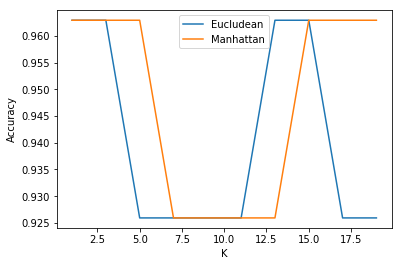

In [715]:
print("Iris Dataset \n--------------------------------")
print("k = 7 80% train 20% test Using euclidean distance")
print("My Implementation")
print("Overall Accuracy",cknnTest(data,4,[0,1,2,3],k=7,t=0.8,func=norm(2),showstats=1))
print("Scikit Accuracy")
print(sciKnn(data,4,[0,1,2,3],k=7,t=0.8))

x,y1,y2 = [],[],[]
for i in range(1,20,2):
    x += [i]
    y1 += [cknnTest(data,4,[0,1,2,3],i,t=0.8)]
    y2 += [cknnTest(data,4,[0,1,2,3],i,t=0.8,func=norm(1))]


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Eucludean","Manhattan"])
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

Interestingly for this pirticular arrangement of data points we see a dip in accuracy for the mid values of K not seen in the robot dataset. This is most likely an outlier as other random shuffles of data points have not resulted in such patterns. Also it seems that we can perfectly predict at most k level with only a one step dip in accuracy and not a smooth decrease indicating as a result of the low number of prediction samples used to validate the data. 

### Question 2 : Naive Bayes Classifier


The naive bayes classifier predicts the label of a data given the probabilty of the data being classified to the pirticular class based on the training data encountered. Using the bayes rule we can estimate the probability of an event(in this case an outcome) $Y$ which is based on a set of attributes $X_1,X_2,...,X_n$ as $$P(Y|X_1,X_2,...X_n) = \frac{P(X_1,X_2,...X_n|Y)P(Y)}{P(X_1,X_2,...X_n)}$$
Using this formulae we can compute the individual elements from the training set as follows
<ul>
    <li>$P(y)$ called the prior can be calculated as $P(Y = 1) = \dfrac{count(Y = 1)}{count(Y = 1) + count(Y = 0)}$ and corresponding for $P(Y = 0)$ where count is the number or tuples with the given condition.</li>
    <li>$P(X_1,X_2,...X_n|Y)$ called the likelihood of the given set of values $X_1,X_2,...X_n$ to predict to the label values $Y$. This is calclated based on the training data provided. Essentially we consider the effect of each attribute on $Y$ to be independent of one another and decompose the joint probability into multiplications of individual probabilities as $$P(X_1,X_2,...X_n|Y) = \prod_{i=(1,2,..,n)}P(X_i|Y)$$ Through this assumption we can now get the individual probabilites as $$P(X_i = a|Y = 0) = \dfrac{count(X_i = a ,Y = 0)}{count(Y = 0)}$$ However finding $X_i = a$ for numerical data is different form categorical data where it involves simply counting the number of tuples with the given value. For numerical data $X_i = a$ represents theprobability of the value being $a$ given a normal distribution of data values of $X_i$ with the constraint of $Y = 0$ (or $Y = 1$). Thus for computing the numerical probability we find the mean and standard deviation of the tuples satisfying the prior condition and use the gaussian distribution to estimate the probability.</li>
    <li>$P(X_1,X_2,...X_n)$ is the normalizing constant. This probabilty for pirticular values of $X_i$ is given by the conditional probability $$ P(X_1,X_2,...X_n) = P(X_1,X_2,...X_n|Y = 1) + P(X_1,X_2,...X_n|Y = 0) $$ To predict the label we need to check if $$ P(Y = 1|X_1,X_2,...X_n) > P(Y = 0|X_1,X_2,...X_n) $$ which equates to $$ \dfrac{P(X_1,X_2,...X_n|Y = 1)P(Y = 1)}{P(X_1,X_2,...X_n)} > \dfrac{P(X_1,X_2,...X_n|Y = 0)P(Y = 0)}{P(X_1,X_2,...X_n)} $$ or vice versa. As both the denominators are equal we just need to compute the numerator for the comparison to be valid.</li>
</ul>

#### Missing Atribute Issue

We might encounter a categorical value for an attribute which is not present in one of the classes based on the training data provided. In such a situation if a prediction is to be made we replace the missing probability with the prior value of the class of which we are calculating the probability of the test data to belong. 

In [492]:
data = pd.read_csv("LoanDataset/data.csv",header=0).values
data = data[:,1:]
np.random.shuffle(data)
label = 8

In [493]:
def condProbCat(data_label):
    d = {}
    ulabel = np.unique(data_label[:,1])
    for l in ulabel:
        du = data_label[data_label[:,1] == l,0]
        total = du.shape[0]
        udu = np.unique(du,return_counts=True)
        for i,j in list(zip(udu[0],udu[1])):
            d[(l,i)] = j/total
    #print(d)      
    def retFunc(val,cond):
        if (cond,val) in d.keys():
            return d[(cond,val)]
        return -1
    return retFunc

def normalDist(p,mean,sdev):
    return (1/(((2*np.pi)**(0.5))*sdev)) * np.e**(-0.5*(((p - mean)**2)/(sdev**2)))

def condProbNum(data_label):
    d = {}
    ulabel = np.unique(data_label[:,1])
    for l in ulabel:
        du = data_label[data_label[:,1] == l,0]
        d[l] = (np.mean(du),np.std(du))
    #print(d)   
    def retFunc(val,cond):
        return normalDist(val,d[cond][0],d[cond][1])
    return retFunc



In [688]:
def createBayes(data,classIndex,features,featureType):
    
    bayesfunc = {}
    for i in features:
        if featureType[i] == 0:
            bayesfunc[i] = condProbCat(data[:,[i,classIndex]])
        else:
            bayesfunc[i] = condProbNum(data[:,[i,classIndex]])
            
    bayesPrior = {}
    ulabel = np.unique(data[:,classIndex],return_counts = True)
    for i,j in list(zip(ulabel[0],ulabel[1])):
        bayesPrior[i] = j/data.shape[0]
    
    return (bayesfunc,bayesPrior)

def bayesPredict(bayes,test,features):
    
    func,prior = bayes[0],bayes[1]
    label = list(prior.keys())[0]
    maxProb = 0
    for i in list(prior.keys()):
        prob = prior[i]
        for j in features:
            p = func[j](test[j],i)
            if p <= 0:
                p = prior[i]
            prob *= p
        if prob > maxProb:
            maxProb = prob
            label = i
    return label

In [495]:
#parameters
#dict having boolean values determining which type is pirticular attribute(feature)
#0 categorical , 1 numerical
featureType = {}
featureType[0] = 1 #age
featureType[1] = 1 #number of years of exp
featureType[2] = 1 #annual income
#featureType[3] = 1 #ZIP Code
featureType[4] = 1 #family size
featureType[5] = 1 #average spending
featureType[6] = 0 #education level
featureType[7] = 1 #mortgage
featureType[9] = 0 #securities
featureType[10] = 0 #CD
featureType[11] = 0 #internet banking
featureType[12] = 0 #credit card
#columns(attribute) indices of features
features = list(featureType.keys())
#column index of label
classIndex = 8

In [498]:
def bayesTest(data,classIndex,features,featureType,t=0.8):
    split = int(t * data.shape[0])
    train = data[0:split]
    validate = data[split:]
    bayes = createBayes(train,classIndex,features,featureType)

    t,f = 0,0
    for i in validate:
        pl = bayesPredict(bayes,i,features)
        if pl == i[classIndex]:
            t += 1
        else:
            f += 1
    
    print("My Accuracy",t/(t+f))
    clf = GaussianNB()
    clf.fit(train[:,features],train[:,classIndex])
    print("Scikit",clf.score(validate[:,features],validate[:,classIndex]))
    

bayesTest(data,classIndex,features,featureType,t=0.9)

My Accuracy 0.9088888888888889
Scikit 0.9


### Question 3 Linear Regression

Linear regression is a prediction algorithm. It tries to predict the outcome of an event based on known outcomes by trying to establish relationships between the input parameters(independent variables) and output parameters(dependent variables). It is genrally done in the form of a linear combination of independent variables(with some offset or intercept). In a system with one dependent and one independent variable this results in the $y = \beta_0 + \beta_1*x$ which is the equation of a line in 2 dimension. Generalizing this equation for multiple independent variable we get $$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$$, i.e. the equation of a hyperplane in n dimension where $x_i$ are the independent variables and $y$ is the outcome(dependent variable).
Intuitively, using in linear regression model we can interpret the coefficient of each of the dependent variable as the amount by which the outcome will change with a unit increase in the corresponding independent variable. It is easy to compare which attributes have a higher effect on the outcome variable provided they have the same scale.

Given a set of training data we can model the coefficients as a system of linear eqiations namely. 
<br><br>
$$\begin{bmatrix} 
    1 & x_{11} & x_{12} & \dots & x_{n1}\\
    1 & x_{21} & x_{22} & \dots & x_{n2}\\
    1 & x_{31} & x_{31} & \dots & x_{n3}\\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1 & x_{m1} & x_{m2} & \dots & x_{mn}
  \end{bmatrix}
  \begin{bmatrix}
      \beta_0 \\
      \beta_1 \\
      \beta_2 \\
      \vdots \\
      \beta_n
   \end{bmatrix}
   = 
   \begin{bmatrix}
       y_1 \\
       y_2 \\
       y_3 \\
       \vdots \\
       y_m
   \end{bmatrix}\\
   A\beta = Y
$$  
Where $y_i$ are the outome varibles in the training dataset with each tuples as $x_1,x_2 ... ,x_n$. We add a $1$ to every tuple in the training dataset to get the intercept. Since for the system of eauations $m$ i.e. the number of training samples is assumed to be greater than $n$, the number of attributes we get the least square error solution for the set of coefficiets as $$\beta = (A^TA)^{-1}A^TY$$. This results in a line which minimizes the mean square error $$\dfrac{1}{m}\sum_{i = 1}^{m}(y_i - (\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n))^2$$

In [6]:
pdata = pd.read_csv("AdmissionDataset/data.csv")
#print(pdata.columns.values)
#print(pdata)
data = pdata.values[:,1:]

In [7]:
def getCoeff(X,Y):
    X = np.hstack((np.ones([X.shape[0],1]),X))
    C = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
    return C

In [8]:
def MAE(ya,yp):
    return abs(ya - yp)
def MSE(ya,yp):
    return (ya - yp)**2
def MPE(ya,yp):
    return 100 * ((ya - yp)/ya)

In [9]:
def LRPredict(coeff,test):
    i = 0
    r = coeff[0].copy()
    while i < test.shape[0]:
        r += (coeff[i+1] * test[i])
        i += 1
    return r

def trainTest(data,classIndex,features,t=0.8,coeff=None,errofunc=MSE):
    split = int(t*data.shape[0])
    train = data[0:split]
    test = data[split:]
    
    coeff = getCoeff(train[:,features],train[:,classIndex].reshape(-1,1)).T[0]
    #if coeff is None:
    #    coeff = trainLinearRegression(train[:,features],train[:,classIndex].reshape(-1,1),func=leastSqDiff,th=0.002)
    
    lr = linear_model.LinearRegression()
    lr.fit(train[:,features],train[:,classIndex])
    #print("My coeff",coeff,"\nScikit coeff",lr.intercept_,lr.coef_)
    
    diff = 0
    for i in test:
        diff += errofunc(i[classIndex],LRPredict(coeff,i[features]))
        
    return coeff,diff/test.shape[0]

In [10]:
classIndex = 7
features = [0,1,2,3,4,5,6]
split = 0.8
coeff,mse = trainTest(data,classIndex,features,t = 0.8)
coeff,mae = trainTest(data,classIndex,features,t = 0.8,coeff=coeff,errofunc=MAE)
coeff,mpe = trainTest(data,classIndex,features,t = 0.8,coeff=coeff,errofunc=MPE)

print("Mean Sqare Test Error",mse, \
     "\nMean Absolute Error",mae,\
     "\nMean Percentage Error",mpe)
print("Coefficients")
for i,j in list(zip(pdata.columns.values[1:],coeff[1:])):
    print(i,j)
print("Intercept",coeff[0])

Mean Sqare Test Error 0.004663968348536452 
Mean Absolute Error 0.04976955657388611 
Mean Percentage Error -2.0491600715708023
Coefficients
GRE Score 0.002057980544862524
TOEFL Score 0.0026126777444574548
University Rating 0.00867679080444594
SOP -0.001952885191627604
LOR  0.015770404479411707
CGPA 0.12150848332125674
Research 0.023728480514238245
Intercept -1.339761439454716


#### Analyzing Coefficients.

From the coefficients obtained we can identify which attributes are relatively more important to the result.
However, it is not necessarily the attributes which have the highest coefficients results as the weights are calculated based on the relative magnitude of the values of the attributes. Example, the coeficients of GRE Score, TOEFL Score are much lower than that of CGPA because these attributes take values take larger values. Each coefficient determines by what percentage the chance of being selected is increased with one point increase in the corresponding attribute. 

Plotting the graphs of a linear regression on GRE and CGPA with both the line pradicted with the GRE only affecting the result, and taking all other attributes including GRE into consideration. The y intercept while considering all attributes is taken arbitarily. This attribute has no consequence and is only used to show the line in a better position w.r.t the other. We are intersested in the change in the slope of the line and the magnitude of the change. Also notice that the intercept and coefficient of SOP are negetive. The intercept therefore does not say much as a negetive probability does not make much sense. Similarly the negetive value for SOP seem to indicate that having a better SOP is bad for the chances of getting selected which might indicate a bias towards other attributes in selection and not necessarily a deteremental quality.

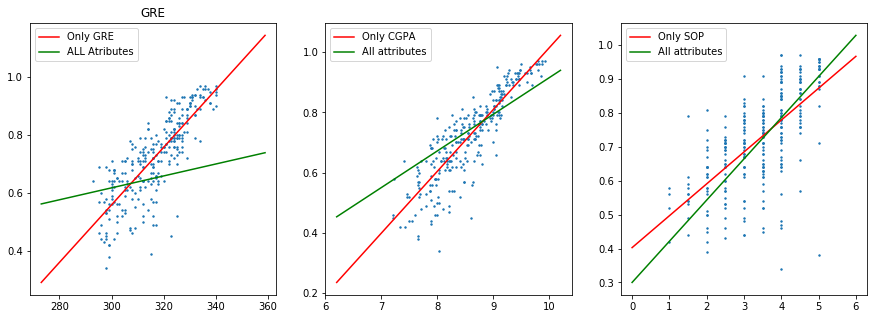

In [610]:
#Plots on 'split' percentage of data
data2 = data[0:int(split * data.shape[0])]
c,m = getCoeff(data2[:,0].reshape(-1,1),data2[:,classIndex].reshape(-1,1))
x = np.arange(np.min(data2[:,0]) - 20, np.max(data2[:,0]) + 20)
y = m*x + c
yp = coeff[1]*x
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(data2[:,0],data2[:,classIndex],s = 2)
plt.plot(x,y,c="red",label="Only GRE")
plt.plot(x,yp,c="green",label="ALL Atributes")
plt.title("GRE")
plt.legend()

plt.subplot(1,3,2)
c,m = getCoeff(data2[:,5].reshape(-1,1),data2[:,classIndex].reshape(-1,1))
x = np.arange(np.min(data2[:,5]) - 1, np.max(data2[:,5]) + 1)
y = m*x + c
plt.scatter(data2[:,5],data2[:,classIndex],s = 2)
plt.plot(x,y,c="red",label="Only CGPA")
yp = coeff[6]*x -0.3
plt.plot(x,yp,c="green",label="All attributes")
plt.legend()

plt.subplot(1,3,3)
c,m = getCoeff(data2[:,3].reshape(-1,1),data2[:,classIndex].reshape(-1,1))
x = np.arange(np.min(data2[:,3]) - 1, np.max(data2[:,3]) + 2)
y = m*x + c
plt.scatter(data2[:,3],data2[:,classIndex],s = 2)
plt.plot(x,y,c="red",label="Only SOP")
yp = coeff[6]*x + 0.3
plt.plot(x,yp,c="green",label="All attributes")
plt.legend()
plt.show()

### Logistic Regression

In [584]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def dsigmoid(sx):
    return sx * (1 - sx)

#function sigmoid gradient descent
def logFunc(coeff,x,yl,lr):
    
    #print(coeff.shape,x.shape)
    t = x.shape[0]
    svec = sigmoid(np.matmul(x,coeff))
    #print(coeff.shape,svec.shape)
    #print((yl.reshape(-1,1) - svec).shape,dsigmoid(svec).shape)
    error = np.sum((yl.reshape(-1,1) - svec)**2)/(2*t)
    coeff = coeff + (1/t) * lr * np.matmul(x.T,((yl.reshape(-1,1) - svec)*dsigmoid(svec)))
    return error,coeff

In [601]:
def trainLogRegression(data,labels,lrate=1,th = 1000):
    
    rcoeff = coeff = np.ones([data.shape[1],1])
    
    error = np.inf
    i = 0
    while i < th:
        nerror,coeff = logFunc(coeff,data,labels,lrate)
        #print(i,nerror)
        if nerror < error:
            rcoeff = coeff
            error = nerror
        i += 1
    return rcoeff

def predict(test,coeff,features,classIndex,params):
    for j in features:
        test[j] = (test[j] - params[j][0])/params[j][1]
    return (test[classIndex] - (sigmoid(test[features].dot(coeff[1:]) + coeff[0])))**2

def trainTestLogRegression(data,featues,classIndex,t=0.8,lrate=1,th=50000,pth = None):
    
    split = int(t * data.shape[0])
    train = data[0:split].copy()
    test = data[split:].copy()
    
    x = train[:,features]
    params = {}
    for i in features:
        params[i] = (np.mean(x[:,i]),np.std(x[:,i]))
        x[:,i] = (x[:,i] - params[i][0])/params[i][1]
    x = np.hstack((np.ones([x.shape[0],1]),x))
    
    coeff = trainLogRegression(x,train[:,classIndex],lrate,th)
    e = 0
    for i in test:
        e += predict(i,coeff,features,classIndex,params)
    print(e/test.shape[0])